<a href="https://colab.research.google.com/github/AmitShukla2808/Credit-Card-Fraud-Detection/blob/main/Credit_Card_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score 
import tensorflow
from tensorflow.keras.layers import Dense
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.metrics import classification_report
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [45]:
train_data = pd.DataFrame(pd.read_csv('/content/training_data.csv'))
train_class_labels = pd.DataFrame(pd.read_csv('/content/train_data_classlabels.csv'))
testing_data = pd.DataFrame(pd.read_csv('/content/testing_data.csv'))
testing_data = testing_data.dropna()

In [46]:
N = train_data.shape[0]
print("Number Of transactions in dataset : {}".format(N))

Number Of transactions in dataset : 57116


In [47]:
train_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,50920,1.086640,0.148385,0.120522,0.974415,-0.035925,-0.406007,0.270339,-0.139679,-0.411854,...,0.086793,0.112405,0.221430,-0.226960,0.046246,0.708183,-0.336475,0.002364,0.021463,76.10
1,34737,1.294054,0.152664,0.195524,0.540694,-0.267245,-0.691144,0.001673,-0.175527,0.179203,...,-0.087916,0.055098,0.213211,-0.163730,-0.064862,0.606466,0.504450,-0.033823,0.006327,5.95
2,11090,-0.352305,0.614321,2.000903,-0.403523,-0.409279,-0.395518,0.094420,0.066611,0.995869,...,-0.059598,0.055236,0.312846,-0.146312,0.317882,-0.307554,0.975876,-0.047407,0.033127,14.95
3,23194,-2.049784,1.004759,1.726403,1.600998,-1.121759,0.421037,-0.768145,1.133876,1.207850,...,0.155066,0.085733,0.445599,-0.234451,0.040248,0.325920,-0.050118,0.257527,-0.015911,76.60
4,38531,-0.289738,0.880936,1.787349,0.887265,0.125174,-0.845201,1.256896,-0.632290,-0.260688,...,0.073293,0.062741,0.503452,-0.202127,0.709686,-0.190366,-0.386543,-0.305748,-0.307859,30.54


In [48]:
train_class_labels.head()

,Class
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


In [49]:
testing_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,48807,-0.839499,0.916987,1.912416,1.108648,-0.672263,0.051176,-0.036875,0.636539,0.050864,...,-0.238961,0.078684,0.414923,-0.085743,0.625238,0.109643,-0.330143,-0.000965,0.003413,15.38
1,40941,-1.560421,1.007666,0.799862,-0.456506,-0.595015,-0.582802,-0.296379,0.964852,-0.204514,...,-0.167403,0.134970,0.288105,-0.154460,0.397320,-0.110161,0.470593,-0.060721,0.014212,1.00
2,46525,-0.216150,-2.541602,-0.932535,0.675208,-1.052992,-0.352356,1.032765,-0.253473,0.087743,...,1.429557,0.397866,-0.554943,-0.808129,0.098446,0.238762,1.014958,-0.251693,0.111646,778.00
3,42859,-0.543125,0.741029,0.552261,0.749349,0.612035,0.797614,1.120176,-0.073450,-0.644201,...,0.098120,0.094355,0.352583,-0.241595,-1.292714,0.009425,-0.152050,0.091837,0.123704,141.75
4,44051,0.887965,-1.055805,0.820712,-0.308878,-1.252033,0.150234,-0.806711,0.214245,0.742892,...,0.351202,0.294355,0.414927,-0.239961,-0.259445,-0.037567,1.501088,-0.099707,0.030234,191.20


**Exploratory Data Analysis**

**Visualisation Of Data**

In [50]:
print(train_data.shape)
print(train_class_labels.shape)

(57116, 30)
(57116, 1)


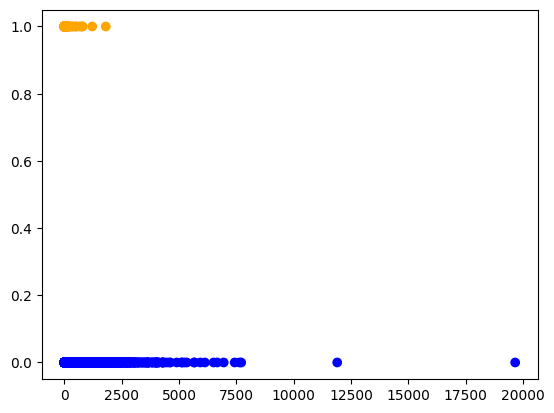

In [51]:
# Frauds with respect to Amount involved in Transaction

colors = {0.0 : 'blue' , 1.0 : 'orange'}
plt.scatter(train_data['Amount'],train_class_labels['Class'],c=train_class_labels['Class'].map(colors))

**Type And Count Of Transactions**

In [52]:
frauds_count = (train_class_labels['Class'] == 1.0).sum()
safe_count = train_data.shape[0] - frauds_count
print("Number of frauds : {}".format(frauds_count))
print("Number of safe transactions : {}".format(safe_count))

Number of frauds : 142
Number of safe transactions : 56974


It can be seen that number of frauds are quite small with respect to non-fraudulent transactions. The number of frauds is only about **0.25%** of all transactions. Hence our dataset is highly unbalanced and we need to handle this skewness.

**Handling The Imbalanced Data : Upsampling And Downsampling**

In [53]:
# For the purpose of making data balanced, we are going to upsample minority class and downsample majority class

fraud = train_data[train_class_labels['Class'] == 1]
fraud_y = train_class_labels[train_class_labels['Class'] == 1]
safe = train_data[train_class_labels['Class'] == 0]
safe_y = train_class_labels[train_class_labels['Class'] == 0]

In [54]:
safe.shape

(56974, 30)

In [55]:
fraud.shape

(142, 30)

In [56]:
safe = safe.iloc[0:42000,:]
safe_y = safe_y.iloc[0:42000,:]

In [57]:
safe.shape

(42000, 30)

In [58]:
while len(fraud) < 10000 :
  fraud = fraud.append(fraud,ignore_index = True)
  fraud_y = fraud_y.append(fraud_y,ignore_index = True)

In [59]:
fraud_y.shape

(18176, 1)

In [60]:
train_data = safe.append(fraud,ignore_index = True)
train_class_labels = safe_y.append(fraud_y,ignore_index = True)

In [61]:
train_class_labels

,Class
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
60171,1.0
60172,1.0
60173,1.0
60174,1.0


The new sampled data has **70%** non-fraudulent data and **30%** fraudulent data.

**Getting Correlation Between Features Using Heatmap**

Here we have tried to use correlation matrix to understand how well features are correlated to target variable Y_data. For this purpose, we generate heatmap that will help us in understanding the correlation. Since the number of features are 30, we are going to create 3 maps just for the purpose of clarity and understanding. The inferences remain same.

In [62]:
X1 = train_data.iloc[:,0:10]
X2 = train_data.iloc[:,10:20]
X3 = train_data.iloc[:,20:30]

X1.insert(10,'Class',train_class_labels,True)
X2.insert(10,'Class',train_class_labels,True)
X3.insert(10,'Class',train_class_labels,True)

<Axes: >

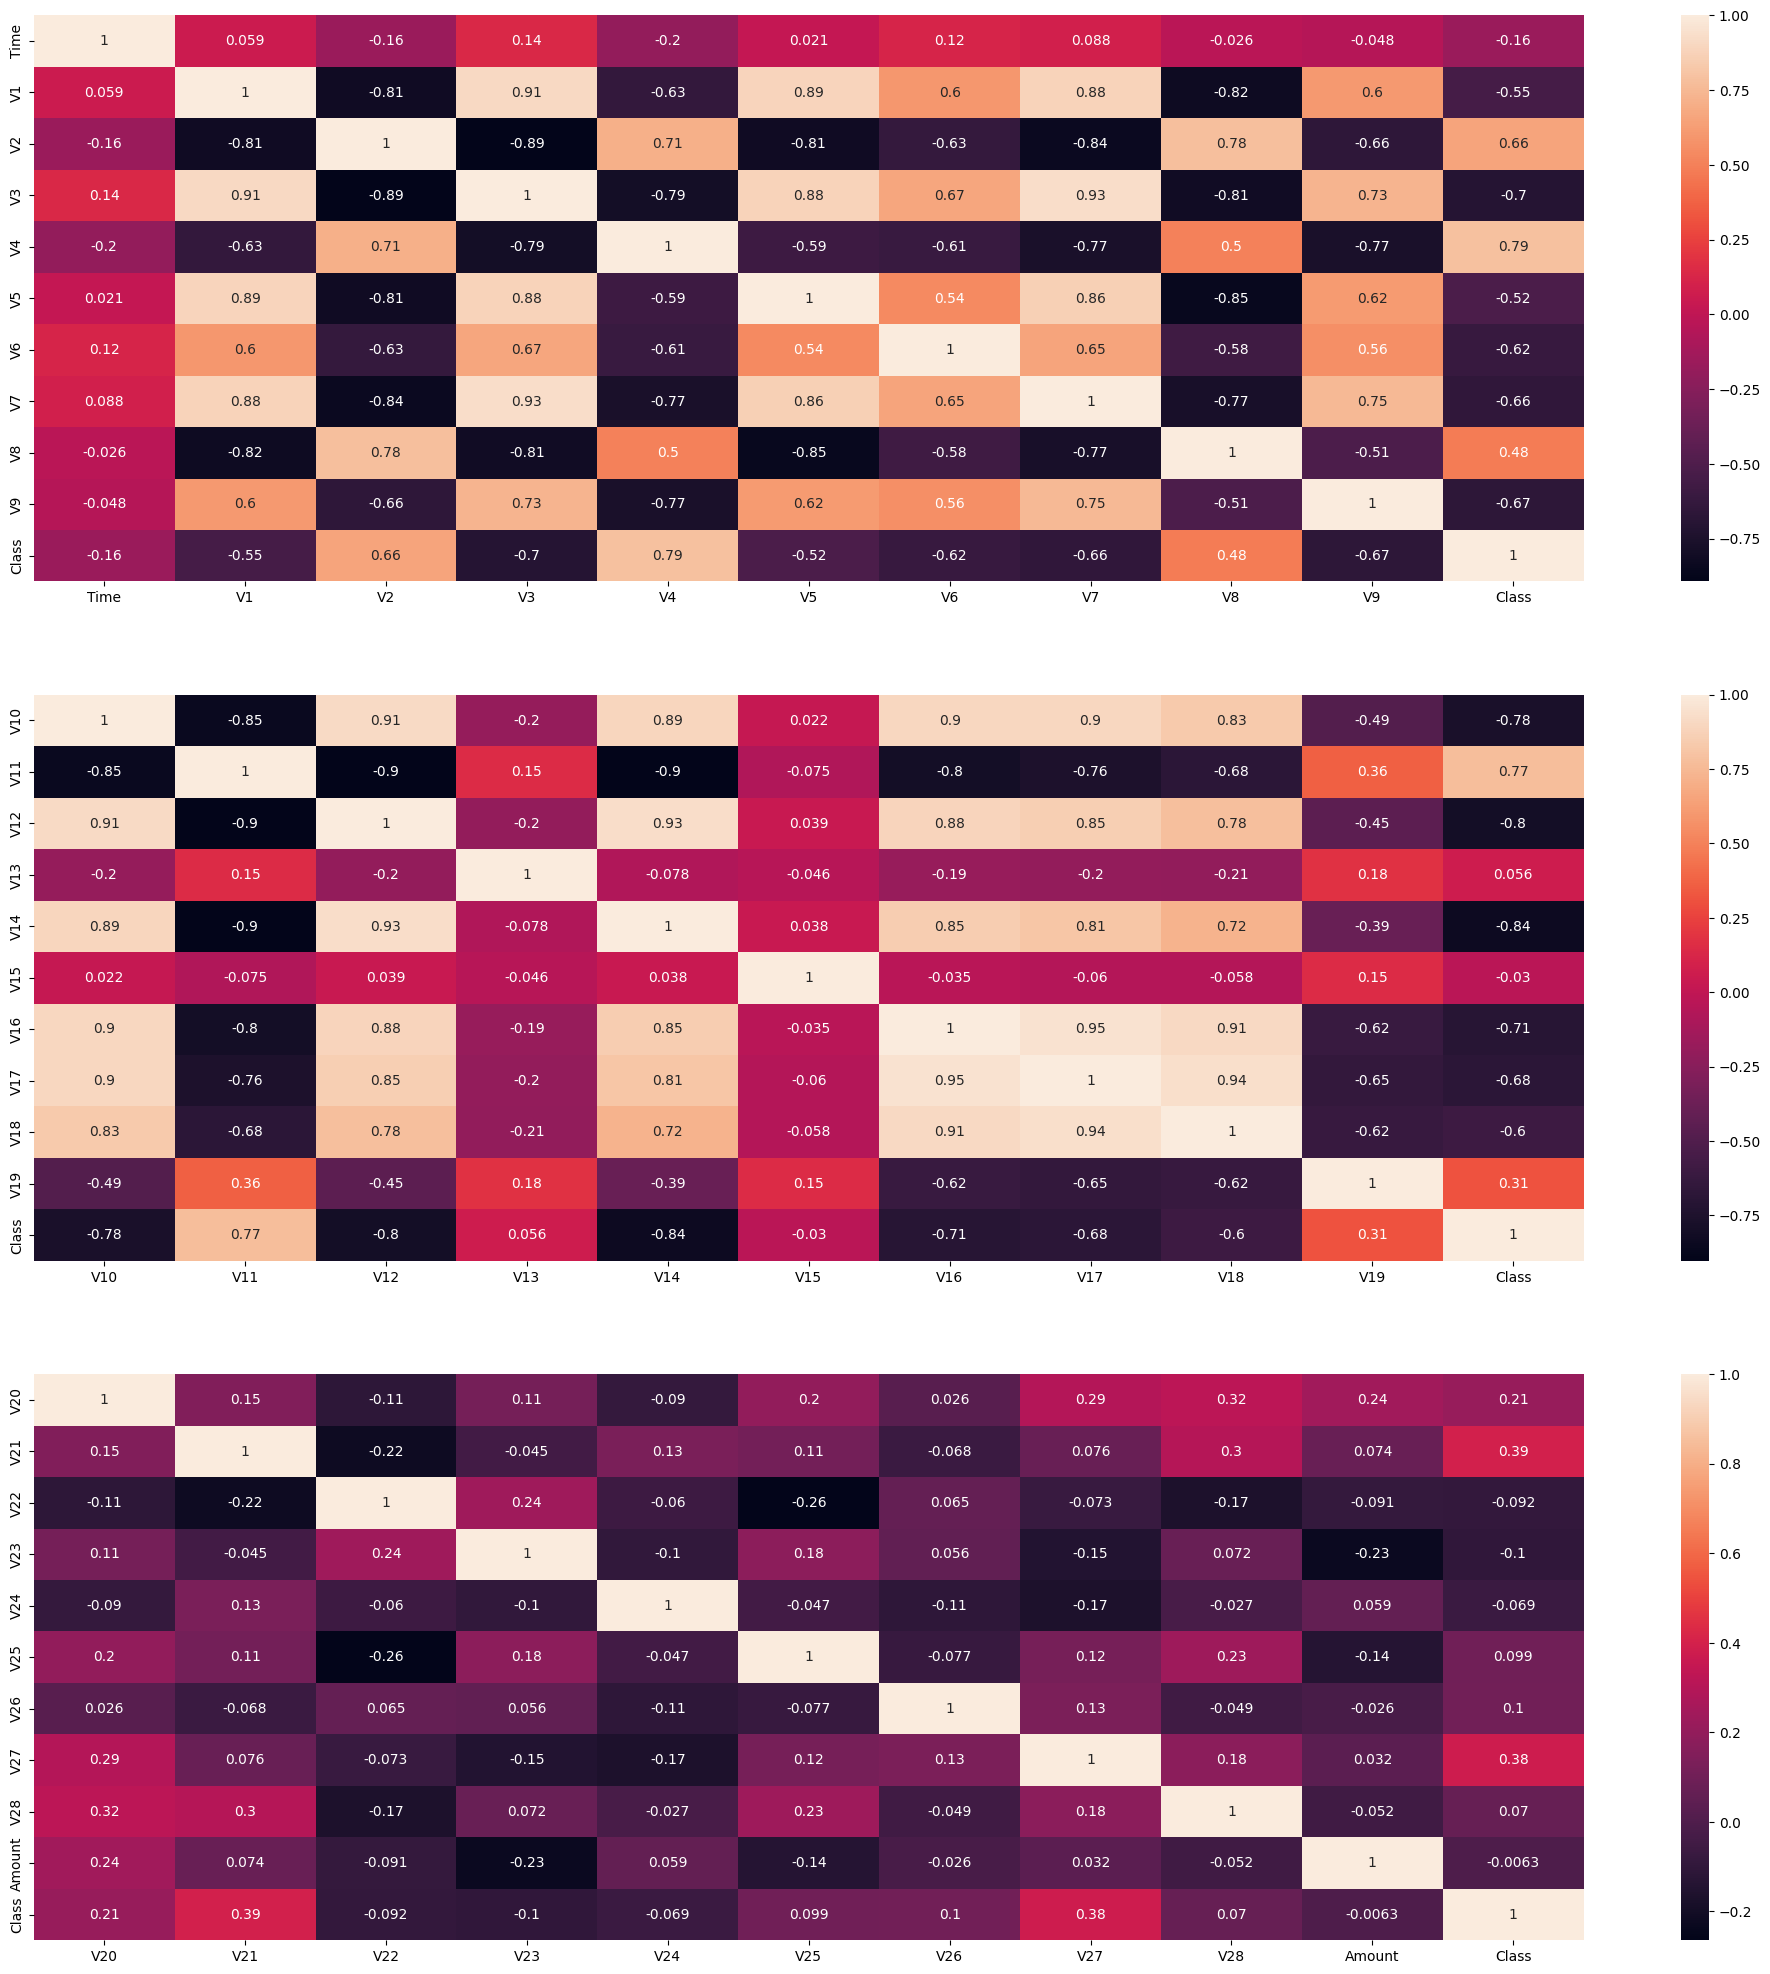

In [63]:
fig,axes = plt.subplots(3,figsize=(25,25))

corr1 = X1.corr()
sns.heatmap(corr1,annot=True,ax=axes[0])

corr2 = X2.corr()
sns.heatmap(corr2,annot=True,ax=axes[1])

corr3 = X3.corr()
sns.heatmap(corr3,annot=True,ax=axes[2])

Now we can see that for the first 10 features V2, V4 and V8 are the ones that correlate most with target variabe Y.

**Feature Selection Using Extra Tree Classifier**

Extra Tree Classifier (Also known as Extremely Randomized Tree Classifier) is a type of ensemble learning technique which aggregates the results of multiple de-correlated decision trees collected in a “forest” to output it’s classification result. In concept, it is very similar to a Random Forest Classifier and only differs from it in the manner of construction of the decision trees in the forest. It calculates importance of each feature and selects top K features with maximum importance. For our problem, K <= 30.

In [64]:
model = ExtraTreesClassifier()
model.fit(train_data,train_class_labels)
importances = model.feature_importances_
importance_normalised = np.std([tree.feature_importances_ for tree in model.estimators_],axis = 0)

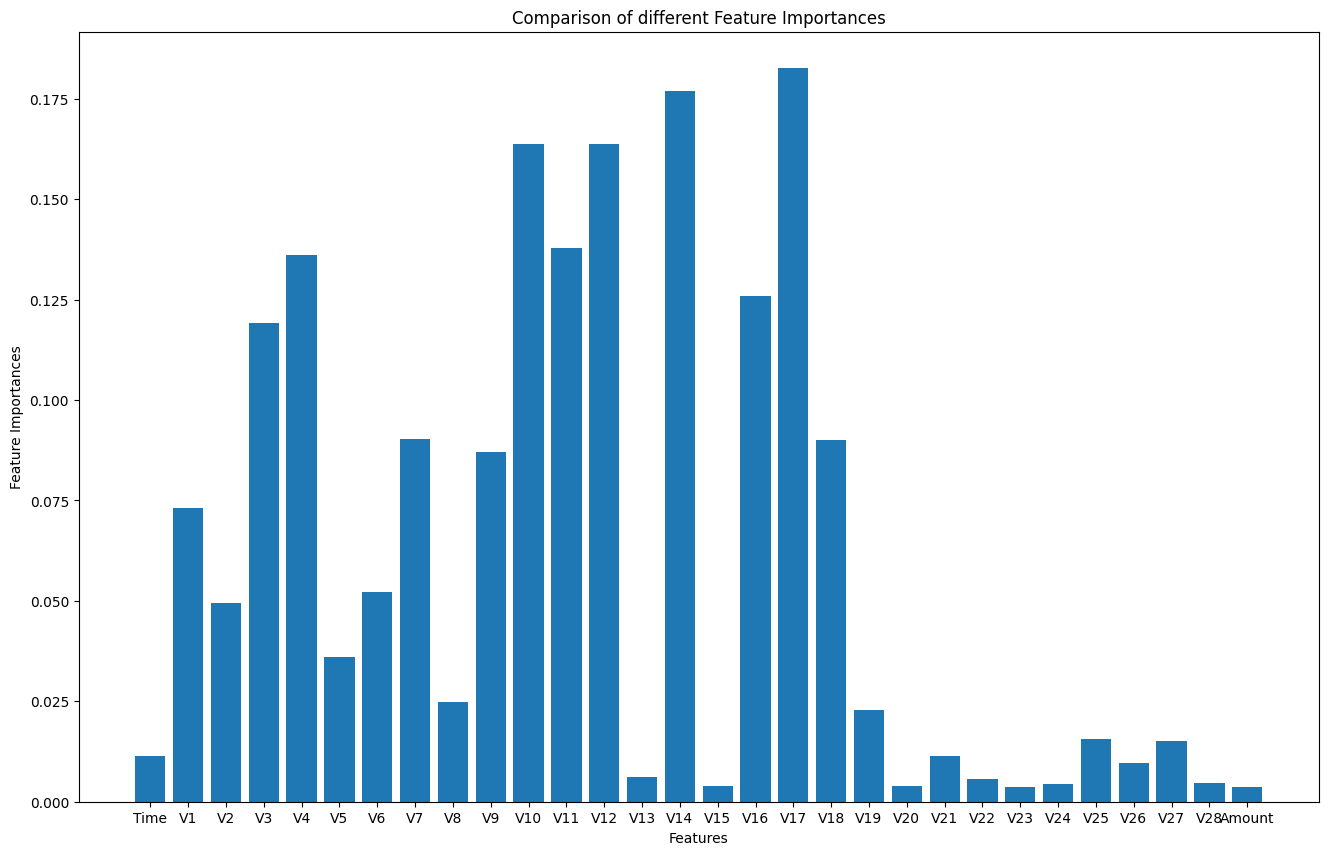

In [65]:
plt.figure(figsize=(16,10))
plt.bar(train_data.columns, importance_normalised)
plt.xlabel('Features')
plt.ylabel('Feature Importances')
plt.title('Comparison of different Feature Importances')
plt.show()

**Different Models To Be Used**

**Logistic Regression Model**

In [66]:
def LogisticRegressionModel() :

  logistic_model = LogisticRegression()            # Creating Model 

  grid = {"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}

  logis_model = GridSearchCV(logistic_model, grid, cv=10)

  logis_model.fit(train_data,train_class_labels)

  preds = logis_model.predict(train_data)

  print("Tuned Paramters (Best Hyperparameters) : ",logis_model.best_params_)
  print("Accuracy Of The Model : {}%".format(logis_model.best_score_*100))
  print("Best Estimator Settings : ",logis_model.best_estimator_)
  print("\n")
  print("Classification Report\n")
  print(classification_report(train_class_labels, preds))
  print("\n")

  print("************** Test Data *************\n")

  preds2 = logis_model.predict(testing_data)
  print('Number Of Frauds : ',preds2.sum())
  print('Safe Transactions : ', len(preds2) - preds2.sum())

**Random Forest Classifier Model**

In [67]:
def RandomForestModel() :

  rand_forest_model = RandomForestClassifier()

  grid = {'criterion' : ['gini','entropy'],'max_depth': list(range(1,5))}

  random_for_model = GridSearchCV(rand_forest_model, grid, cv = 10, scoring = 'accuracy')

  random_for_model.fit(train_data,train_class_labels)

  preds = random_for_model.predict(train_data)

  print("Tuned Paramters (Best Hyperparameters) : ",random_for_model.best_params_)
  print("Accuracy Of The Model : {}%".format(random_for_model.best_score_*100))
  print("Best Estimator Settings : ",random_for_model.best_estimator_)
  print("\n")
  print("Classification Report\n")
  print(classification_report(train_class_labels, preds))
  print("\n")

  print("************** Test Data *************\n")

  preds2 = random_for_model.predict(testing_data)
  print('Number Of Frauds : ',preds2.sum())
  print('Safe Transactions : ', len(preds2) - preds2.sum())

**K Nearest Neighbors Model**

In [68]:
def KNearestNeighborsModel() :

  KNN_model = KNeighborsClassifier()

  grid = {'n_neighbors' : list(range(1,10)),'metric' : ['minkowski','euclidean']}

  KNNei_model = GridSearchCV(KNN_model, grid, cv = 10, scoring='accuracy', return_train_score=False)

  KNNei_model.fit(train_data,train_class_labels)

  preds = KNNei_model.predict(train_data)

  print("Tuned Paramters (Best Hyperparameters) : ",KNNei_model.best_params_)
  print("Accuracy Of The Model : {}%".format(KNNei_model.best_score_*100))
  print("Best Estimator Settings : ",KNNei_model.best_estimator_)
  print("\n")
  print("Classification Report\n")
  print(classification_report(train_class_labels, preds))
  print("\n")

  print("************** Test Data *************\n")

  preds2 = KNNei_model.predict(testing_data)
  print('Number Of Frauds : ',preds2.sum())
  print('Safe Transactions : ', len(preds2) - preds2.sum())

**Neural Network Model**

In [69]:
def build_model(optimizer,loss):
  model = tensorflow.keras.Sequential([
                  Dense(units = 40,input_shape = [train_data.shape[1]],activation = 'relu'),
                  Dense(units = 30, activation = 'relu'),
                  Dense(units = 20, activation = 'relu'),
                  Dense(units = 10, activation = 'relu'),
                  Dense(units = 1, activation = 'sigmoid'),
                  ])
  model.compile(loss=loss,optimizer=optimizer)
  return model

In [70]:
def NeuralNetworkModel():

  neural_model = KerasClassifier(build_fn=build_model)

  grid = {'batch_size':[100,500],'epochs':[20,30],'optimizer': ['adam'],'loss' : ['binary_crossentropy']}

  neur_model = GridSearchCV(estimator = neural_model, param_grid = grid,cv = 10, scoring = 'accuracy')

  neur_model.fit(train_data,train_class_labels,verbose = 0)

  preds = neur_model.predict(train_data)

  print("Tuned Paramters (Best Hyperparameters) : ",neur_model.best_params_)
  print("Accuracy Of The Model : {}%".format(neur_model.best_score_*100))
  print("Best Estimator Settings : ",neur_model.best_estimator_)
  print("\n")
  print("Classification Report\n")
  print(classification_report(train_class_labels, preds))
  print("\n")

  print("************** Test Data *************\n")

  preds2 = neur_model.predict(testing_data)
  print('Number Of Frauds : ',preds2.sum())
  print('Safe Transactions : ', len(preds2) - preds2.sum())



**Running Of Models**

In [71]:
LogisticRegressionModel()

Tuned Paramters (Best Hyperparameters) :  {'C': 0.001, 'penalty': 'l2'}
Accuracy Of The Model : 96.58999981938842%
Best Estimator Settings :  LogisticRegression(C=0.001)


Classification Report

              precision    recall  f1-score   support

         0.0       0.96      0.99      0.98     42000
         1.0       0.97      0.92      0.94     18176

    accuracy                           0.97     60176
   macro avg       0.97      0.95      0.96     60176
weighted avg       0.97      0.97      0.97     60176



************** Test Data *************

Number Of Frauds :  229.0
Safe Transactions :  14050.0


In [72]:
RandomForestModel()

Tuned Paramters (Best Hyperparameters) :  {'criterion': 'entropy', 'max_depth': 4}
Accuracy Of The Model : 97.33780653496827%
Best Estimator Settings :  RandomForestClassifier(criterion='entropy', max_depth=4)


Classification Report

              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98     42000
         1.0       1.00      0.90      0.95     18176

    accuracy                           0.97     60176
   macro avg       0.98      0.95      0.96     60176
weighted avg       0.97      0.97      0.97     60176



************** Test Data *************

Number Of Frauds :  40.0
Safe Transactions :  14239.0


In [73]:
KNearestNeighborsModel()

Tuned Paramters (Best Hyperparameters) :  {'metric': 'minkowski', 'n_neighbors': 1}
Accuracy Of The Model : 99.94516064017796%
Best Estimator Settings :  KNeighborsClassifier(n_neighbors=1)


Classification Report

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     42000
         1.0       1.00      1.00      1.00     18176

    accuracy                           1.00     60176
   macro avg       1.00      1.00      1.00     60176
weighted avg       1.00      1.00      1.00     60176



************** Test Data *************

Number Of Frauds :  15.0
Safe Transactions :  14264.0


In [43]:
NeuralNetworkModel()

1881/1881 [==============================] - 3s 1ms/step
Tuned Paramters (Best Hyperparameters) :  {'batch_size': 100, 'epochs': 20, 'loss': 'binary_crossentropy', 'optimizer': 'adam'}
Accuracy Of The Model : 97.46888938193455%
Best Estimator Settings :  <keras.wrappers.scikit_learn.KerasClassifier object at 0x7fc66768a310>


Classification Report

              precision    recall  f1-score   support

         0.0       0.70      1.00      0.82     42000
         1.0       0.00      0.00      0.00     18176

    accuracy                           0.70     60176
   macro avg       0.35      0.50      0.41     60176
weighted avg       0.49      0.70      0.57     60176



************** Test Data *************

447/447 [==============================] - 1s 1ms/step
Number Of Frauds :  0.0
Safe Transactions :  14279.0
